## Test the tfrecord and provider for ICDAR_test

In [29]:
# Transform the images and ground truth file into tfrecord
# Use slim to write the provider

In [49]:
# Use slim provider to load the data
import tensorflow as tf
import sys
sys.path.insert(0,'/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/')
from datasets_test import ICDAR2013_Provider
import skimage.io as skio
import cv2
import numpy as np
#tf._version_
slim = tf.contrib.slim

In [63]:
def visualize_bbox(image, bboxes,type=1):
    """
    Input: image (height, width, channels)
           bboxes (numof bboxes, 4) in order(ymin, xmin, ymax, xmax)
                  range(0,1) 
    """
    numofbox = bboxes.shape[0]
    width = image.shape[1]
    height = image.shape[0]
    if type == 1:
        xmin = [i for i in bboxes[:,0]]
        ymin = [i for i in bboxes[:,1]]
        w = [i for i in bboxes[:,2]]
        h = [i for i in bboxes[:,3]]

        for i in range(numofbox):
            dst_image = cv2.rectangle(image,(xmin[i],ymin[i]),
                                 (xmin[i]+w[i],ymin[i]+h[i]),(0,255,255))
    else:
        xmin = [int(i * width) for i in bboxes[:,1]]
        ymin = [int(i * height) for i in bboxes[:,0]]
        ymax = [int(i * height) for i in bboxes[:,2]]
        xmax = [int(i * width) for i in bboxes[:,3]]

        for i in range(numofbox):
            dst_image = cv2.rectangle(image,(xmin[i],ymin[i]),
                                 (xmax[i],ymax[i]),(255,0,0))
    skio.imshow(dst_image)
    skio.show()

file_path: /Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/*.tfrecord


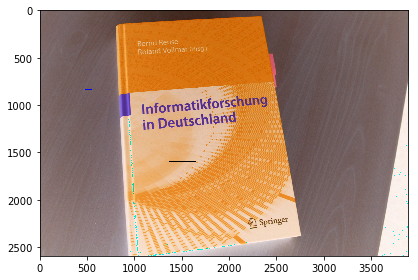

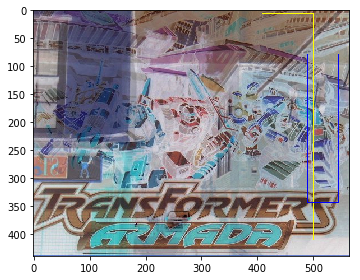

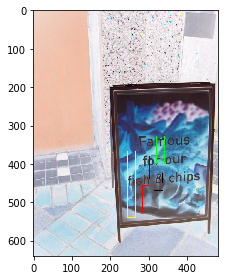

In [64]:
with tf.Graph().as_default():
    dataset = ICDAR2013_Provider.get_datasets('/Users/kiyoshi/Desktop/Research/LAB/FirstAccessment/2ndPaper/Textbox-Tensor/datasets_test/',file_pattern='*.tfrecord')

    data_provider = slim.dataset_data_provider.DatasetDataProvider(dataset, common_queue_capacity=32, common_queue_min=2)

    [image, shape, glabels, gbboxes,height,width] = \
    data_provider.get(['image', 'shape',
                    'object/label',
                    'object/bbox','height','width'])
    
    image = tf.cast(image, tf.float32) 
    bbox_image = tf.image.draw_bounding_boxes(tf.expand_dims(image,0), tf.expand_dims(gbboxes,0))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        with slim.queues.QueueRunners(sess):
            for i in xrange(3):
                img, shape_, glabels_, bbox_,bbox_image_ = \
                sess.run([image, shape, glabels, gbboxes,bbox_image])
                skio.imshow(np.uint8(bbox_image_[0,:,:,:])*255)
                skio.show()
        

In [65]:
#img, shape_, glabels_, bbox_,bbox_image_
print img.shape
print shape_
print len(glabels_)
print bbox_.shape

(640, 480, 3)
[640 480   3]
6
(6, 4)


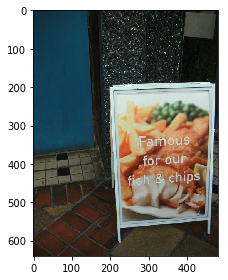

In [66]:
numofbox = bbox_.shape[0]
bboxes = bbox_
xmin = [int(i ) for i in bboxes[:,0]]
ymin = [int(i) for i in bboxes[:,1]]
xmax = [int(i) for i in bboxes[:,2]]
ymax = [int(i ) for i in bboxes[:,3]]

for i in range(numofbox):
    dst_image = cv2.rectangle(np.uint8(img),(xmin[i],ymin[i]),
                         (xmax[i],ymax[i]),(255,0,0))

skio.imshow(dst_image)
skio.show()